Task 1 : TITANIC SURVIVAL PREDICTION 
model that predicts whether a passenger on the Titanic survived or not.

In [1]:
#importing important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import  train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import plotly.express as px

Data collection and loading

In [2]:
data=pd.read_csv('train.csv')#importing dataset
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
data.shape

(891, 12)

In [4]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Data Visualization



In [5]:
# pie chart showing rate of survival
survived_counts = data['Survived'].value_counts().reset_index()
survived_counts.columns = ['Survived', 'Count']

fig = px.pie(survived_counts, values='Count', names='Survived', title='Survived', labels={'Count': 'Count'}, color=['No', 'Yes'])
fig.update_traces(textposition='inside', textinfo='percent+label+value')
fig.update_layout(uniformtext_minsize=14, uniformtext_mode='hide')
fig.show()

<Axes: xlabel='Pclass', ylabel='count'>

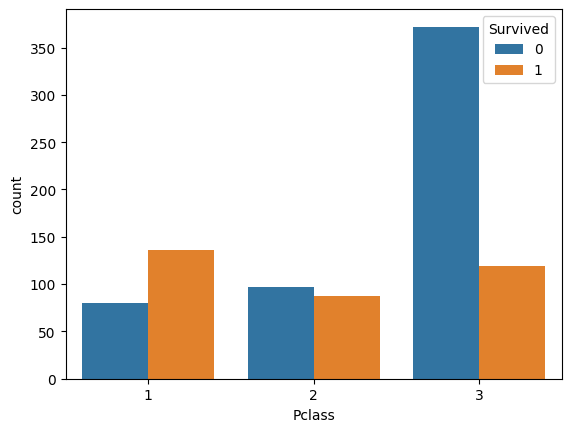

In [6]:
sns.countplot(x=data['Pclass'] ,hue='Survived', data=data) #analysing the data using countplot

<Axes: xlabel='Sex', ylabel='count'>

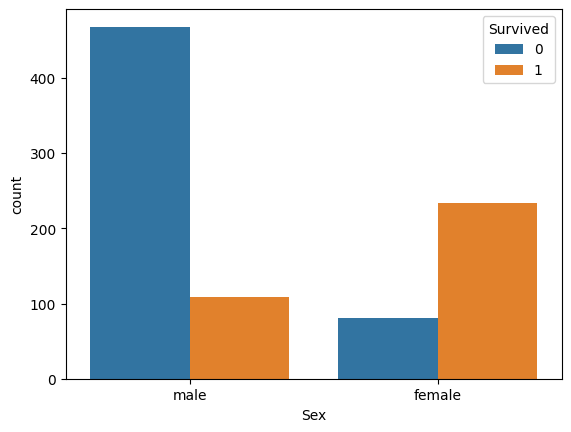

In [7]:
sns.countplot(x=data['Sex'] ,hue='Survived', data=data)#Analysing the gender wise survival rate

Data preprocessing

In [8]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
#Removing/replacing Unnecessary Data
data=data.drop(columns=['PassengerId','Name','Ticket','Cabin'])

In [10]:
#Filling the empty values with the mean of their respective classes.
for i in range (1,4):
    x=int(data[data['Pclass']== i]['Age'].mean())
    data['Age']=data['Age'].fillna(x) 
    
data['Embarked']=data['Embarked'].fillna(np.random.choice(data['Embarked'].mode()))

In [11]:
data=data.replace({'Sex': {'male': 0, 'female': 1}, 'Embarked': {'S':1,'C':2,'Q':3}})

Exploratory Data analysis


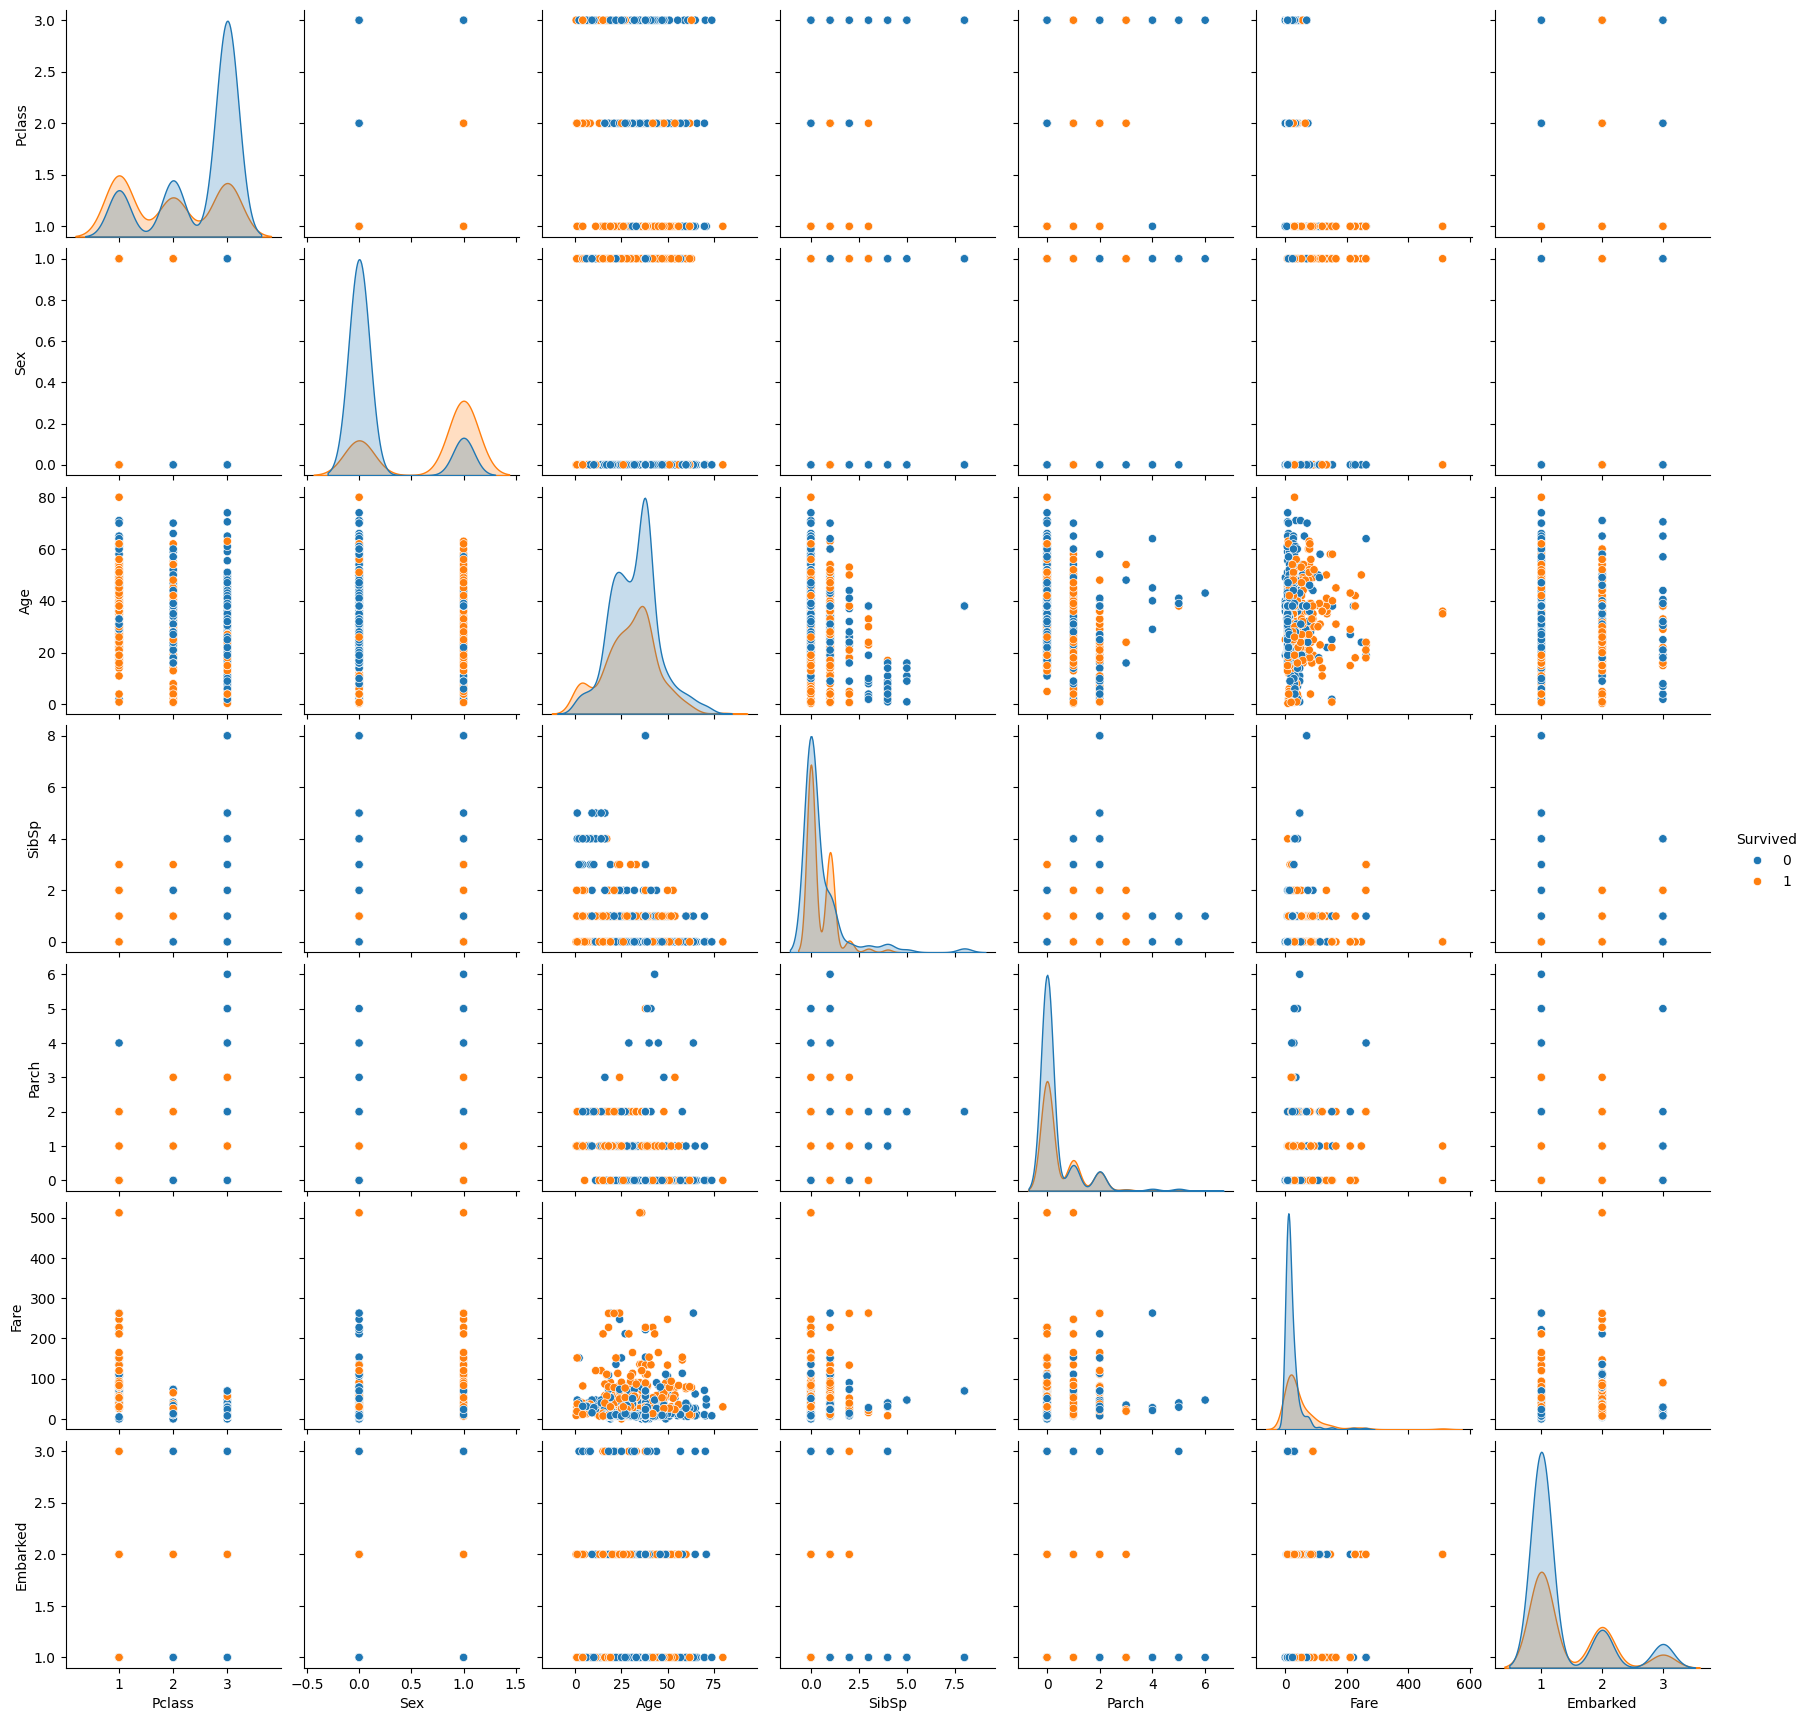

In [12]:
sns.pairplot(data,hue='Survived')

<Axes: >

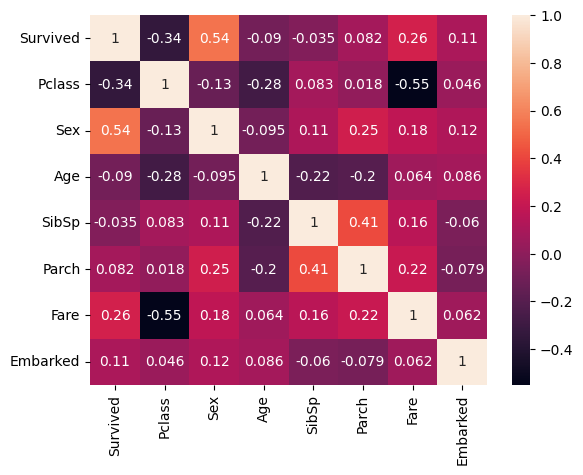

In [13]:
sns.heatmap(data.corr(),annot=True)

Spliting the data into test data and train data 

In [14]:
x=data.drop(columns='Survived')
y=data['Survived'] #target coloumn

In [15]:
print(x ,y)

     Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
0         3    0  22.0      1      0   7.2500         1
1         1    1  38.0      1      0  71.2833         2
2         3    1  26.0      0      0   7.9250         1
3         1    1  35.0      1      0  53.1000         1
4         3    0  35.0      0      0   8.0500         1
..      ...  ...   ...    ...    ...      ...       ...
886       2    0  27.0      0      0  13.0000         1
887       1    1  19.0      0      0  30.0000         1
888       3    1  38.0      1      2  23.4500         1
889       1    0  26.0      0      0  30.0000         2
890       3    0  32.0      0      0   7.7500         3

[891 rows x 7 columns] 0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


In [16]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

Logistic regression and model training


In [17]:
model=LogisticRegression()

In [18]:
model.fit(x_train,y_train)

C:\Users\vikra\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

Testing the model

In [19]:
x_train_prediction=model.predict(x_train)
print(x_train_prediction)

[0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 1 0 1
 0 0 0 0 0 0 1 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 1 0 0 1 1 0 0 1 1 0 1 0 0 1
 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 1 0 0 0 1 1 1 0 1 0 0 0 0 0 1 0 0 0
 1 1 0 0 1 0 0 1 0 0 1 0 0 1 0 1 0 1 0 1 0 1 1 1 1 1 1 0 0 1 1 1 0 0 1 0 0
 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0 1 1 1
 0 0 0 0 0 0 0 1 0 0 1 0 0 1 1 1 0 1 0 0 0 0 0 1 1 0 1 1 1 1 0 0 0 0 0 0 0
 0 1 0 0 1 1 1 0 0 1 0 1 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0
 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 0 1 1 0 0 0 0 1 0 1 0 0 1 0 0 0 1 0 0 0
 0 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 1 0 0 0 1 0 1 0 0 0 0 0 0 1 1 0 1 1
 0 1 0 1 0 0 0 0 0 0 0 1 0 1 0 0 1 1 1 0 1 0 0 0 0 1 1 0 0 0 1 0 1 1 1 0 0
 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 1 1 0 1 1 0 0 0
 0 1 0 1 0 0 1 1 0 0 0 0 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 1 0 0
 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 1 1 0 1 0 0 1 0 0 0 1 1 0 1 0
 0 0 0 0 0 0 0 1 0 1 0 0 

In [20]:
training_data_accuracy=accuracy_score(y_train,x_train_prediction)
print("Accuracy score of training data: " ,training_data_accuracy)

Accuracy score of training data:  0.8202247191011236


In [21]:
test_data_prediction =model.predict(x_test)

In [22]:
test_data_accuracy=accuracy_score(y_test,test_data_prediction)
print("Accuracy score of testing data: ", test_data_accuracy)

Accuracy score of testing data:  0.776536312849162


In [24]:
#Function to determine whether a person survived based on their attributes: Pclass, Sex, Age, SibSp, Parch, Fare, and Embarked.
import warnings
warnings.filterwarnings("ignore")

survive=model.predict([[45,3,22.0,1,0,7.2500,2]])
if(survive==0):
    print("Not Survived")
else:
    print("Survived")
    

Not Survived
